In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather/kmeans.csv
/kaggle/input/kmeans/income.csv


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('../input/kmeans/income.csv')
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [20]:

scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df.head(5)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


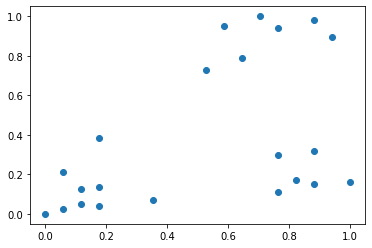

In [21]:
plt.scatter(df['Age'], df['Income($)'])

In [22]:
k_range = range(1, 11)
sse = []
for k in k_range:
    kmc = KMeans(n_clusters=k)
    kmc.fit(df[['Age', 'Income($)']])
    sse.append(kmc.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.1685851223602976,
 0.13265419827245162,
 0.11661724746706856,
 0.07996937425152907]

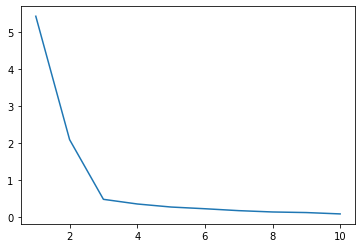

In [23]:
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Sum of Squared Errors'
plt.plot(k_range, sse)

In [24]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [25]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [26]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [27]:
df0 = df[df.cluster == 0]
df0

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


In [28]:
df1 = df[df.cluster == 1]
df1

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
11,Tom,0.000000,0.000000,1
12,Arnold,0.058824,0.025641,1
13,Jared,0.117647,0.051282,1
14,Stark,0.176471,0.038462,1
15,Ranbir,0.352941,0.068376,1


In [29]:
df2 = df[df.cluster == 2]
df2

,Name,Age,Income($),cluster
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2
10,Donald,0.647059,0.786325,2


In [30]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

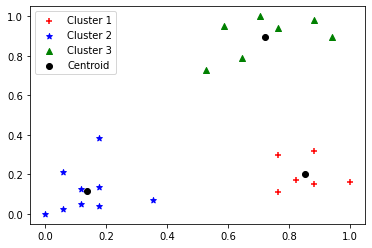

In [31]:
p1 = plt.scatter(df0['Age'], df0['Income($)'], marker='+', color='red')
p2 = plt.scatter(df1['Age'], df1['Income($)'], marker='*', color='blue')
p3 = plt.scatter(df2['Age'], df2['Income($)'], marker='^', color='green')
c = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.legend((p1, p2, p3, c),
          ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroid'))